In [13]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import numpy as np
import matplotlib.pyplot as plt
import os
import graphviz
def _exp(x):
    return np.exp(x)
exp = make_function(function=_exp,
                        name='exp',
                        arity=1)
# function nodes
function_set = ['add', 'sub', 'mul', 'div', 'sin', "cos", "log", exp]
# init_depth means depth range for initial generation
gp = SymbolicRegressor(population_size=1000,
                        generations=50,
                        p_crossover=0.7,
                        p_subtree_mutation=0.,
                        p_hoist_mutation=0.,
                        p_point_mutation=0.,
                        stopping_criteria=0.01,
                        verbose=1,
                        parsimony_coefficient=0., 
                        function_set=function_set)

# Get Data
data = np.genfromtxt("data.csv", delimiter=",")
x_train = data[:,0].reshape(-1,1)
y_train = data[:,1]

gp.fit(x_train, y_train)
predictions = gp.predict(x_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


<ipython-input-13-1f0be3b987aa>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(x)


Check
   0    15.51              inf        5         0.250014              N/A     25.14s
Check
   1    13.82     1.17228e+125        6          0.18657              N/A     24.25s
Check
   2    15.09         0.935197        9         0.111792              N/A     24.17s
Check
   3     6.80         0.528713        9         0.111792              N/A     21.07s
Check
   4     7.27         0.483713       14        0.0686103              N/A     20.56s
Check
   5     9.54         0.456945       14        0.0686103              N/A     21.48s
Check
   6     9.54         0.506729       14        0.0686103              N/A     19.87s
Check
   7    11.37      1.70062e+34       12        0.0642892              N/A     19.81s
Check
   8    13.73         0.922601       16        0.0627617              N/A     20.59s
Check
   9    13.02      9.44246e+32       18        0.0620823              N/A     19.28s
Check
  10    12.91      1.20855e+14       22        0.0595187              N/A     18.80s

In [14]:
print(predictions)

[-0.23434728 -0.26662453 -0.29368975 -0.31218677 -0.31890428 -0.3110937
 -0.28666704 -0.24421641 -0.18283874 -0.10178819  0.          0.12447203
  0.27508531  0.45752113  0.68053488  0.95703561  1.30551742  1.75198653
  2.3325297   3.09662934  4.11120469]


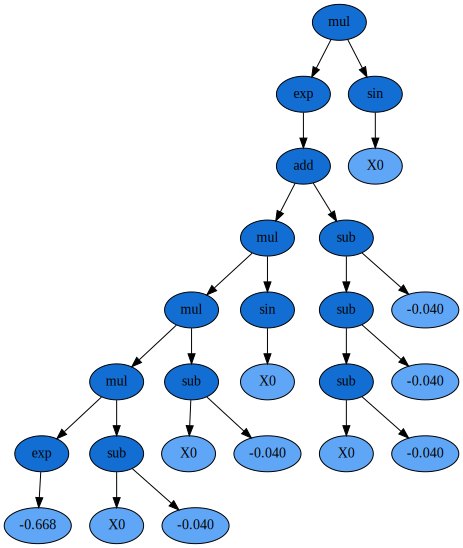

In [15]:
dot_data = gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [16]:
# Check if the estimator stored the evolutionary history
num_gens = len(gp._programs)

(a) a plot of the fitness (y-axis) of the best individual in each generation (x-axis);

Text(0, 0.5, 'Fitness of best individual')

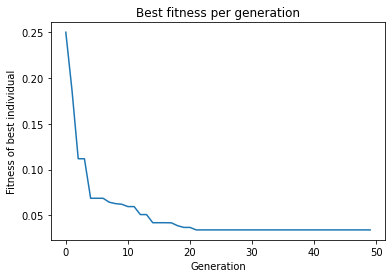

In [17]:
best_fitnesses = gp.run_details_["best_fitness"]
plt.plot(np.arange(num_gens), best_fitnesses)
plt.title("Best fitness per generation")
plt.xlabel("Generation")
plt.ylabel("Fitness of best individual")

(b) a plot with the size (y-axis), that is, number of nodes, of the individuals with the
highest fitness in their generation (x-axis), i.e. the individuals corresponding to the fitnesses shown in (a)); a plot of average sizes (y-axis) for each generation
(x-axis). Plot also the spread (for instance as shadowed area) between the
minimum and maximum size at each generation.

The GP framework *gplearn* has a built-in array <code>best_length</code> in which the size of the individual with the highest fitness of each generation is stored. Thus, to plot the size of the best individual of their generation, we make use of this variable. 

Text(0, 0.5, 'Size')

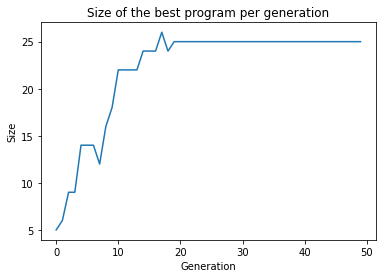

In [18]:
# a plot with the size of the individuals with the highest fitness in their generation
best_sizes = gp.run_details_["best_length"]
plt.plot(np.arange(num_gens), best_sizes)
plt.title("Size of the best program per generation")
plt.xlabel("Generation")
plt.ylabel("Size")

The GP framework *gplearn* has a built-in array <code>average_length</code> in which the average size of each generation is stored. Thus, to plot the average sizes per generation, we make use of this variable. 

Text(0, 0.5, 'Size')

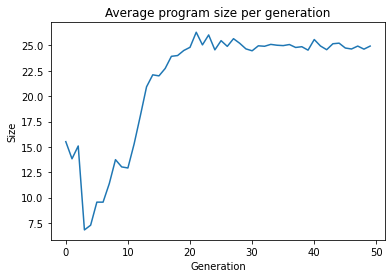

In [19]:
# a plot of average sizes for each generation
avg_sizes = gp.run_details_["average_length"]
plt.plot(np.arange(num_gens), avg_sizes)
plt.title("Average program size per generation")
plt.xlabel("Generation")
plt.ylabel("Size")

The GP framework *gplearn* does not offer by default any variable that stores the spread, the minimum or the maximum of the program size at each generation. Thus, in order to plot the spread between the minimum and maximum size of the programs at each generation, we edited the file <code>genetic.py</code> of the *gplearn* framework, in which we instantiated two new arrays, <code>min_length</code> and <code>max_length</code> that respectively store the minimum program size and the maximum program size of each generation.

Note that the documentation of the *gplearn* framework mentions "any programs in earlier generations that were discarded through the selection process are replaced with None objects to conserve memory". This is why we decided to modify the code of the framework itself rather than performing the computations in the current file. 

Text(0, 0.5, 'Size')

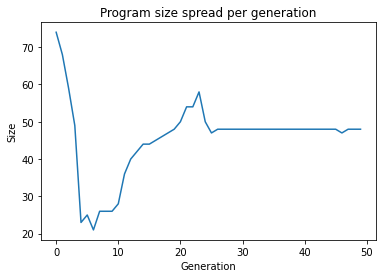

In [20]:
# a plot of the spread between the minimum and maximum size at each generation
min_sizes = gp.run_details_["min_length"]
max_sizes = gp.run_details_["max_length"]
plt.plot(np.arange(num_gens), np.subtract(max_sizes, min_sizes))
plt.title("Program size spread per generation")
plt.xlabel("Generation")
plt.ylabel("Size")

Can you observe any undesirable phenomenon from these plots? In case of positive
answer, how would you try to overcome the related problem? (You can refer to - and
briefly describe - a specific paper from the literature)

We observe, that the size of the programs tends to bloat, even though the gain in performance is negligible. E.g. at Generation 10, the best program reached a performance around 0.06 with a size of around 10. Over the next generations, the size of the programs bloated up to 25 but the performance only increased to around 0.035. 

One way to overcome this is to introduce size penalty factors, e.g. parsimony. Parsimony pressure has been presented in Poli et al. (2008) as a method to control bloating in GP. The parsimony pressure method consists on using a modified selection probability which subtracts a certain value from the fitness of the programs based on their sizes. The bigger the size, the bigger the penalty which will essentially promote programs with smaller sizes. 

References: 

Poli, R., Langdon, W. B., &amp; McFee, N. F. (2008). A field guide to genetic programming . Retrieved February 12, 2022, from https://www.researchgate.net/publication/216301261_A_Field_Guide_to_Genetic_Programming 